<a href="https://colab.research.google.com/github/pihk94/Free2move/blob/master/Analyse_Melchior_Prugniaud.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Analyse des données e-commerce

Tout d'abord, importons les packages que nous utiliserons.

In [2]:
pip install geopandas

     |████████████████████████████████| 972kB 7.7MB/s 
     |████████████████████████████████| 10.9MB 20.0MB/s 
     |████████████████████████████████| 14.7MB 263kB/s 


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
from datetime import datetime
from pylab import rcParams
rcParams['figure.figsize'] = 18, 10

Import des fichiers csv.

In [4]:
!git clone https://github.com/pihk94/Free2move

Cloning into 'Free2move'...
remote: Enumerating objects: 54, done.
remote: Counting objects: 100% (54/54), done.
remote: Compressing objects: 100% (49/49), done.
remote: Total 54 (delta 23), reused 20 (delta 3), pack-reused 0
Unpacking objects: 100% (54/54), done.


In [5]:
!wget https://github.com/datasets-br/state-codes/blob/master/data/br-state-codes.csv codes.csv

--2020-08-05 07:03:21--  https://github.com/datasets-br/state-codes/blob/master/data/br-state-codes.csv
Resolving github.com (github.com)... 140.82.118.4
Connecting to github.com (github.com)|140.82.118.4|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/html]
Saving to: ‘br-state-codes.csv’

br-state-codes.csv      [ <=>                ] 106.40K  --.-KB/s    in 0.02s   

2020-08-05 07:03:21 (6.91 MB/s) - ‘br-state-codes.csv’ saved [108956]

--2020-08-05 07:03:21--  http://codes.csv/
Resolving codes.csv (codes.csv)... failed: Name or service not known.
wget: unable to resolve host address ‘codes.csv’
FINISHED --2020-08-05 07:03:21--
Total wall clock time: 0.5s
Downloaded: 1 files, 106K in 0.02s (6.91 MB/s)


In [6]:
products = pd.read_csv('Free2move/data/products.csv')
items = pd.read_csv('Free2move/data/items.csv')
customers = pd.read_csv('Free2move/data/customer.csv')
orders = pd.read_csv('Free2move/data/orders.csv')

In [ ]:
for i,j in zip([products, items, customers, orders],['products','items','customers','orders']):
    print('Les dimensions de {} sont : {} entrées pour {} colonnes.\nLes variables sont :\n {}\n'.format(
    j, i.shape[0], i.shape[1], list(i.columns) ))

Les dimensions de products sont : 32951 entrées pour 10 colonnes.
Les variables sont :
 ['product_id', 'product_category_name', 'product_name_lenght', 'product_description_lenght', 'product_photos_qty', 'product_weight_g', 'product_length_cm', 'product_height_cm', 'product_width_cm', 'product_category_name_english']

Les dimensions de items sont : 112650 entrées pour 7 colonnes.
Les variables sont :
 ['order_id', 'order_item_id', 'product_id', 'seller_id', 'shipping_limit_date', 'price', 'freight_value']

Les dimensions de customers sont : 99441 entrées pour 5 colonnes.
Les variables sont :
 ['customer_id', 'customer_unique_id', 'customer_zip_code_prefix', 'customer_city', 'customer_state']

Les dimensions de orders sont : 99441 entrées pour 8 colonnes.
Les variables sont :
 ['order_id', 'customer_id', 'order_status', 'order_purchase_timestamp', 'order_approved_at', 'order_delivered_carrier_date', 'order_delivered_customer_date', 'order_estimated_delivery_date']



## Rapide statistiques descriptives des différentes tables

Commençons par la table 'products'.



In [ ]:
products.head(5)

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumery,40.0,287.0,1.0,225.0,16.0,10.0,14.0,perfumery
1,3aa071139cb16b67ca9e5dea641aaa2f,art,44.0,276.0,1.0,1000.0,30.0,18.0,20.0,art
2,96bd76ec8810374ed1b65e291975717f,sports_leisure,46.0,250.0,1.0,154.0,18.0,9.0,15.0,sports_leisure
3,cef67bcfe19066a932b7673e239eb23d,baby,27.0,261.0,1.0,371.0,26.0,4.0,26.0,baby
4,9dc1a7de274444849c219cff195d0b71,housewares,37.0,402.0,4.0,625.0,20.0,17.0,13.0,housewares


In [ ]:
products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 10 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   product_id                     32951 non-null  object 
 1   product_category_name          32328 non-null  object 
 2   product_name_lenght            32341 non-null  float64
 3   product_description_lenght     32341 non-null  float64
 4   product_photos_qty             32341 non-null  float64
 5   product_weight_g               32949 non-null  float64
 6   product_length_cm              32949 non-null  float64
 7   product_height_cm              32949 non-null  float64
 8   product_width_cm               32949 non-null  float64
 9   product_category_name_english  32328 non-null  object 
dtypes: float64(7), object(3)
memory usage: 2.5+ MB


Cette table contient 10 colonnes, dont une qui est l'id du produit et les autres concernent les spécificités des objets (poids, dimensions...). De plus, on retrouve des valeurs manquantes ou nulles pour toutes les colonnes exceptés l'identifiant du produit.

Deux colonnes se ressemblent, product_category_name et product_category_name_english, voyons si elles sont identiques.

In [ ]:
products[(products.product_category_name != products.product_category_name_english)].product_category_name.map(str).value_counts()

nan    623
Name: product_category_name, dtype: int64

In [ ]:
products.drop('product_category_name_english',axis = 1, inplace=True)

In [ ]:
print('Liste des 20 catégories de produits les plus présentes')
products.product_category_name.value_counts().head(20)

Liste des 20 catégories de produits les plus présentes


bed_bath_table                     3029
sports_leisure                     2867
furniture_decor                    2657
health_beauty                      2444
housewares                         2335
auto                               1900
computers_accessories              1639
toys                               1411
watches_gifts                      1329
telephony                          1134
baby                                919
perfumery                           868
stationery                          849
fashion_bags_accessories            849
cool_stuff                          789
garden_tools                        753
pet_shop                            719
electronics                         517
construction_tools_construction     400
home_appliances                     370
Name: product_category_name, dtype: int64

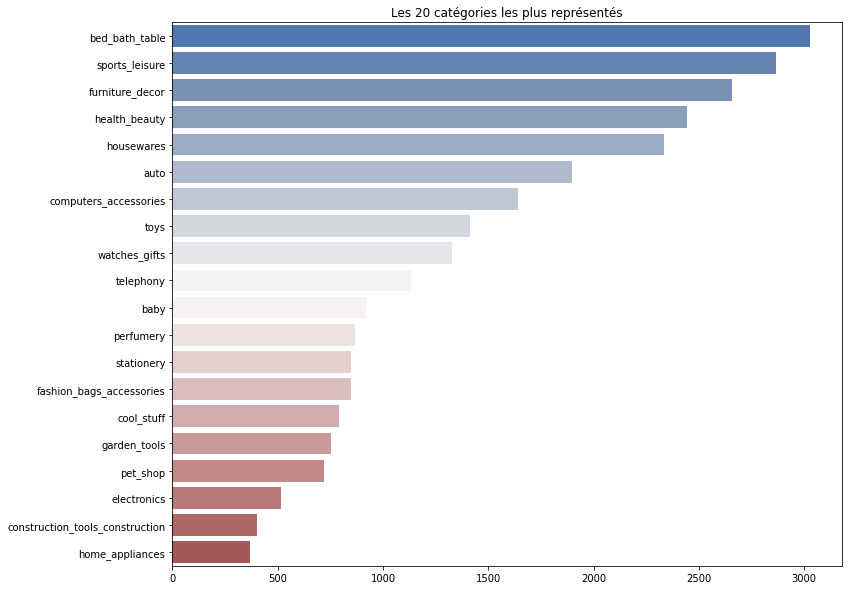

In [ ]:
plt.figure(figsize=(12,10))
plt.title('Les 20 catégories les plus représentés')
sns.barplot(x = products.product_category_name.value_counts().head(20).values, y = products.product_category_name.value_counts().head(20).index, palette="vlag")

Pour les autres variables, on peut représenter la distribution de chacune permettant ainsi de tirer quelques observations comme par exemple qu'en moyenne les produits sont de petites tailles (20cm x 20cm x 20cm) et font un poids aux alentours de 1 kg. Ce qui correspond bien aux observations réalisés ci-dessus dans les catégories les plus vendues (parfums, téléphone, fourniture de décor...).

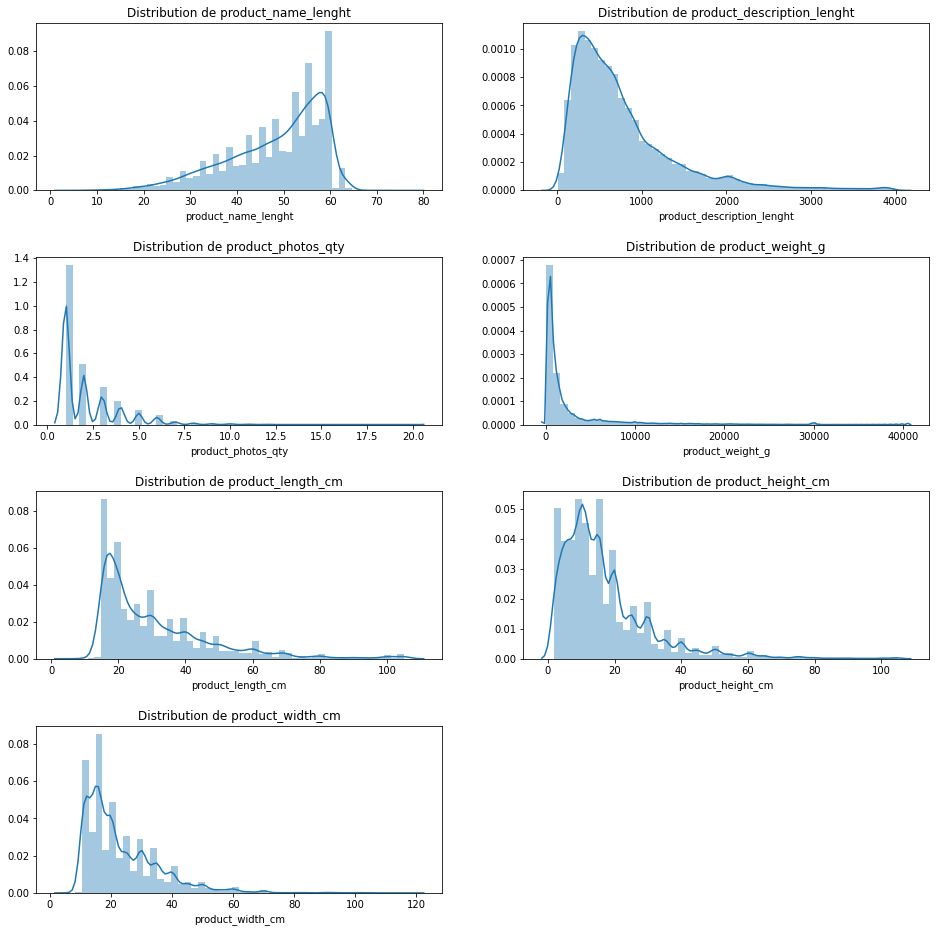

In [ ]:
plt.figure(figsize = (16,16))
plt.subplots_adjust(hspace=0.4)
for var,i in zip(['product_name_lenght', 'product_description_lenght', 'product_photos_qty', 'product_weight_g', 'product_length_cm','product_height_cm','product_width_cm'],range(7)):
    ax = plt.subplot(4,2,i+1)
    ax.set_title('Distribution de '+var)
    sns.distplot(products[var])

#### Analysons désormais la table orders

Deux des variables sont des variables liées à l'identification du client et de l'ordre.

In [ ]:
orders.head(5)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [ ]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


La grande majorité des ordres ont été délivrés (97%), ou sont dans le processus de livraison (shipped, processing, invoiced, approved), le reste étant annulé ou indisponible (1%). Cet e-commerce possède donc un historique de vente conséquent comparé au nombre de commandes en cours.

In [ ]:
orders.order_status.value_counts()

delivered      96478
shipped         1107
canceled         625
unavailable      609
invoiced         314
processing       301
created            5
approved           2
Name: order_status, dtype: int64

In [7]:
orders.order_purchase_timestamp = pd.to_datetime(orders.order_purchase_timestamp)

Afin de mieux visualiser les évolutions des ventes au cours du temps, l'impact du jour de la semaine, du mois ou de l'année, je vais créer des variables supplémentaires.


In [8]:
def extract_day(x):
    """
        Input : 
            x : datetime
        Output:
            Jour de la semaine
    """
    dic = {0:'Lundi',1:'Mardi',2:'Mercredi',3:'Jeudi',4:'Vendredi',5:'Samedi',6:'Dimanche'}
    weekday = x.weekday()
    return dic[weekday]
def extract_month(x):
    """
        Input : 
            x: datetime
        Output : 
            Nom du mois
    """
    dic = {1:"Janvier",2:"Février",3:"Mars",4:"Avril",5:"Mai",6:"Juin",7:"Juillet",8:"Août",9:"Septembre",10:"Octobre",
          11:"Novembre",12:"Décembre"}
    month = x.month
    return dic[month]
def extract_year(x):
    """
        Input :
            x : datetime
        Output :
            Année
    """
    return x.year
def extract_month_year(x):
    """
        Input:
            x : datetime
        Output:
            Année et mois
    """
    return x.strftime('%Y%m')

In [9]:
orders['WeekDay'] = orders.order_purchase_timestamp.apply(extract_day)
orders['Month'] = orders.order_purchase_timestamp.apply(extract_month)
orders['NumMonth'] = orders.order_purchase_timestamp.dt.month
orders['Year'] = orders.order_purchase_timestamp.apply(extract_year)
orders['Month_year'] = orders.order_purchase_timestamp.apply(extract_month_year)
orders['Quarter'] = orders.order_purchase_timestamp.dt.quarter

Seul trois mois sont présent en 2016, le nombre de commandes a augmenté sur toute la période. Il est encore en augmentation en 2018 et il ne concerne pourtant que 9 mois de 2018 laissant entendre une croissance plus forte encore sur 2018.

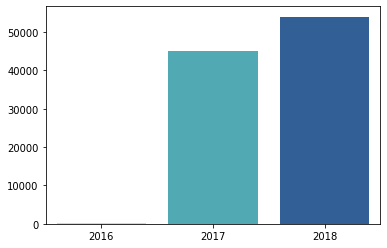

In [ ]:
sns.barplot(x = orders.Year.value_counts().index, y = orders.Year.value_counts().values, palette='YlGnBu')

La répartition en fonction du semestre semble être assez identique car nous avons presque uniquement les données de 2017 pour le dernier trimestre de l'année.

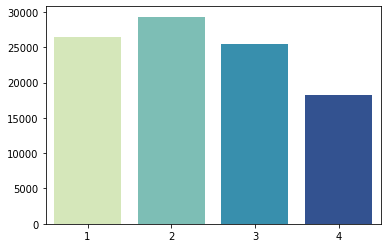

In [ ]:
sns.barplot(x = orders.Quarter.value_counts().index, y = orders.Quarter.value_counts().values, palette='YlGnBu')

Les jours de la semaine semble avoir un impact sur le nombre de commande, le week end notamment il y a bien moins de commandes.

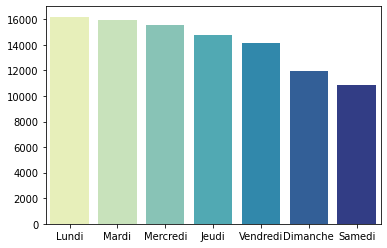

In [ ]:
sns.barplot(x = orders.WeekDay.value_counts().index, y = orders.WeekDay.value_counts().values, palette='YlGnBu')

Comme vu précédement, les mois de fin d'année réalisent un nombre de commandes moins important. Tandis que ceux autour de la demi année semblent plus propices.

In [ ]:
data = pd.DataFrame()
lst = []
dic = {1:"Janvier",2:"Février",3:"Mars",4:"Avril",5:"Mai",6:"Juin",7:"Juillet",8:"Août",9:"Septembre",10:"Octobre",
          11:"Novembre",12:"Décembre"}
for year in orders.Year.unique():
    for mois in orders.NumMonth.unique():
        nb = len(orders[(orders.NumMonth == mois) & (orders.Year == year)])
        lst += [(year, mois, nb, dic[mois])]
data = pd.DataFrame(lst, columns = ['Annee','NumMois','Nbre',"Mois"])
data = data[data.Annee > 2016]
data.sort_values(["Annee","NumMois"],inplace=True)

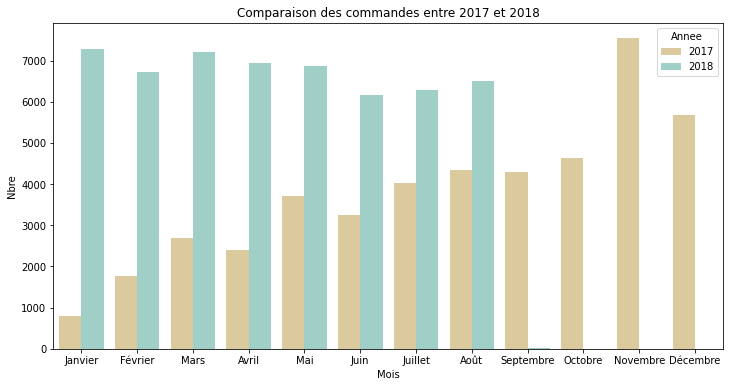

In [ ]:
plt.figure(figsize=(12,6))
plt.title('Comparaison des commandes entre 2017 et 2018')
sns.barplot(data = data, x = "Mois", y = "Nbre", hue ="Annee", palette='BrBG')
plt.show()

L'e-commerce semble avoir eu une croissance assez rapide en 2017 pour atteindre en 2018 une stagnation aux alentours de 7000 commandes.

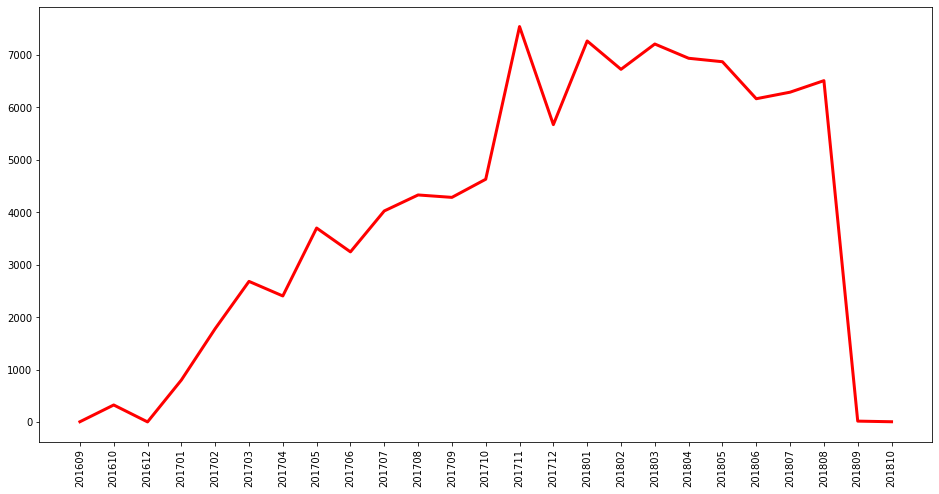

In [ ]:
plt.figure(figsize=(16,8))
sns.lineplot(data=orders['Month_year'].value_counts().sort_index(), 
             color='red', linewidth=3)
plt.xticks(rotation=90)
plt.show()

Je vais créer une dernière variable, pour découper l'heure et voir l'influence de celle ci sur le nombre de commande.

In [ ]:
def extract_heure(x):
    hour = x.hour
    if hour <= 6:
        return '0-6',x.hour
    elif hour > 6 and hour <= 12:
        return '6-12',x.hour
    elif hour > 12 and hour <= 18:
        return '12-18',x.hour
    elif hour > 18:
        return '18-24',x.hour
orders["Hours"],orders['ExactHour'] = zip(*orders.order_purchase_timestamp.apply(extract_heure))

Les commandes sont plus nombreuses l'après midi avec près de 2 tiers des commandes réalisés à ce moment là. La tranche la moins présente est celle de 0-6 heures

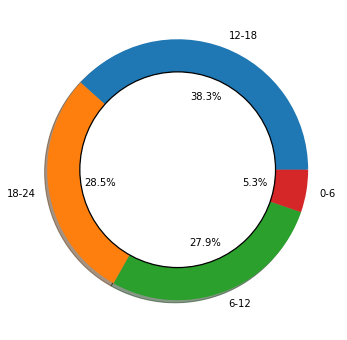

In [ ]:
plt.figure(figsize=(12,6))
plt.pie(orders.Hours.value_counts().values / len(orders), explode=(0,0,0,0), labels=orders.Hours.value_counts().index,
        autopct='%1.1f%%', shadow=True)
my_circle=plt.Circle((0,0),0.75,color='black', fc='white',linewidth=1.25)
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.show()

Pour les prochaines variables qui sont les heures à laquelle la commande est passé à une étape supérieur, je vais uniquement calculé les délais entre chaque étape.


In [ ]:
orders.order_approved_at = pd.to_datetime(orders.order_approved_at)
orders.order_delivered_carrier_date = pd.to_datetime(orders.order_delivered_carrier_date)
orders.order_delivered_customer_date = pd.to_datetime(orders.order_delivered_customer_date)
orders.order_estimated_delivery_date = pd.to_datetime(orders.order_estimated_delivery_date)

In [ ]:
def diff_delai(x,y):
    return (y - x).days

In [ ]:
orders['purchase_approved'] = orders.apply(lambda rows : diff_delai(rows.order_purchase_timestamp, rows.order_approved_at), axis = 1)
orders['approved_carrier'] = orders.apply(lambda rows : diff_delai(rows.order_approved_at, rows.order_delivered_carrier_date), axis = 1)
orders['carrier_customer'] = orders.apply(lambda rows : diff_delai(rows.order_delivered_carrier_date, rows.order_delivered_customer_date), axis = 1)
orders['customer_estimated'] = orders.apply(lambda rows : diff_delai(rows.order_delivered_customer_date, rows.order_estimated_delivery_date), axis = 1)
orders['purchase_customer'] = orders.apply(lambda rows : diff_delai(rows.order_approved_at, rows.order_delivered_customer_date), axis = 1)

Rapidement, les affichages ci-dessous permettent devoir les délais moyens en fonction des étapes.
Par exemple, il faut compter environ 10 jours du passage de la commande à sa reception chez le client.

In [ ]:
for i,var in zip(range(4),['purchase_approved','approved_carrier','carrier_customer','customer_estimated','purchase_customer']):
    print('Variable ' + var + '\n')
    print(orders[var].describe())

Variable purchase_approved

count    99281.000000
mean         0.269800
std          0.986202
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max        187.000000
Name: purchase_approved, dtype: float64
Variable approved_carrier

count    97644.000000
mean         2.301749
std          3.560283
min       -172.000000
25%          0.000000
50%          1.000000
75%          3.000000
max        125.000000
Name: approved_carrier, dtype: float64
Variable carrier_customer

count    96475.000000
mean         8.878310
std          8.746088
min        -17.000000
25%          4.000000
50%          7.000000
75%         12.000000
max        205.000000
Name: carrier_customer, dtype: float64
Variable customer_estimated

count    96476.000000
mean        10.876881
std         10.183854
min       -189.000000
25%          6.000000
50%         11.000000
75%         16.000000
max        146.000000
Name: customer_estimated, dtype: float64


#### Analysons désormais la table Customers

Deux des variables sont des variables liées à l'identification du client.

In [ ]:
customers.head(5)

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [ ]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


En regardant les indicatifs des états de chaque client ainsi que les villes, il est facile de conclure que cet e-commerce vend au Brésil ses produits. Voici donc une visualisation rapide du nombre de commandes en fonction de l'état brésilien du client.




In [ ]:
filepath = "Free2move/data/BRA_adm1.shp"
map_df = gpd.read_file(filepath)

In [ ]:
map_df.head()

,ID_0,ISO,NAME_0,ID_1,NAME_1,TYPE_1,ENGTYPE_1,NL_NAME_1,VARNAME_1,geometry
0,33,BRA,Brazil,1,Acre,Estado,State,None,None,"POLYGON ((-73.33251 -7.32488, -73.27482 -7.350..."
1,33,BRA,Brazil,2,Alagoas,Estado,State,None,None,"MULTIPOLYGON (((-35.90153 -9.86180, -35.90153 ..."
2,33,BRA,Brazil,3,Amapá,Estado,State,None,None,"MULTIPOLYGON (((-50.02403 0.85986, -50.02403 0..."
3,33,BRA,Brazil,4,Amazonas,Estado,State,None,Amazone,"POLYGON ((-67.32623 2.02968, -67.30118 1.92997..."
4,33,BRA,Brazil,5,Bahia,Estado,State,None,Ba¡a,"MULTIPOLYGON (((-38.69708 -17.97903, -38.69708..."


Problème : Les abbréviations des pays ne sont pas disponible dans ce dataset, j"en importe donc un autre les contenant.

In [ ]:
codes = pd.read_csv('Free2move/data/codes_states.csv',delimiter=",")

Jonture gauche entre les deux dataframes. 
Puis création d'une table mettant en lumière le nombre de client.


In [ ]:
map_df = pd.merge(map_df, codes[["name","region","subdivision"]], how="left", left_on = "NAME_1", right_on = "name")

In [ ]:
map_info = pd.DataFrame(customers.groupby(["customer_state"]).customer_state.count())
map_info.columns = ['Nbre']
map_info.head(4)

,Nbre
customer_state,
AC,81
AL,413
AM,148
AP,68


In [ ]:
map = pd.merge(map_df, map_info, how='left', left_on = 'subdivision', right_index=True)

In [ ]:
map['logNbre'] = map.Nbre.apply(np.log)

A travers la carte ci dessous, il est possible de distinguer des états ayant une forte clientèle comparativement à d'autres. Cependant, ces résultats sont aussi liés à la densité de population de ces états et au fait que les états proche de l'océan sont les plus peuplés.

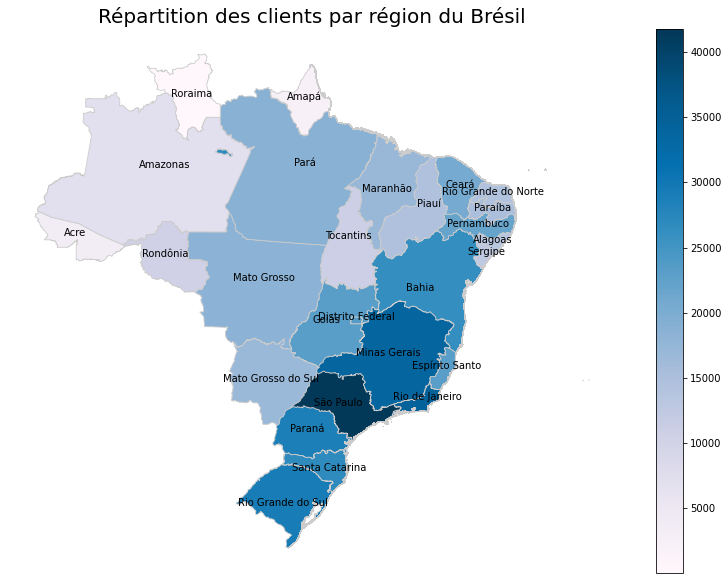

In [ ]:
variable = "logNbre"
vmin, vmax = map_info.Nbre.min(), map_info.Nbre.max()
fig, ax = plt.subplots(1, figsize=(14, 10))
map.plot(column=variable, cmap='PuBu', linewidth=0.8, ax=ax, edgecolor='0.8')
map['coords'] = map['geometry'].apply(lambda x: x.representative_point().coords[:])
map['coords'] = [coords[0] for coords in map['coords']]
for idx, row in map.iterrows():
    plt.annotate(s=row['NAME_1'], xy=row['coords'],horizontalalignment='center')
ax.set_title('Répartition des clients par région du Brésil', fontdict={'fontsize': '20', 'fontweight' : '3'})
ax.axis('off')
sm = plt.cm.ScalarMappable(cmap='PuBu', norm=plt.Normalize(vmin=vmin, vmax=vmax))
sm._A = []
cbar = fig.colorbar(sm)


#### Analysons désormais la table Items

Il existe trois variables qui concernent l'identification d'élements (vendeur, produits et commandes). Puis on a le prix et les frais de port. Shipping_limit_date est vraisemblablement la date maximale à laquelle le vendeur doit envoyer la commande. Il reste order_item_id. Cette variable va de 1 à 21. Vu que nul part ailleurs il y existe le nombre d'objets dans la commande, je pars du principe que cela correspond à cela.

In [ ]:
items.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


En regardant le nombre total de lignes comparé aux nombre total dans la table orders, on se rend compte qu'il semble qu'il existe un problème de doublons, ou une structure de données différentes.

In [ ]:
items.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


En effet, certains order id sont présent jusqu'à 21 fois.

In [ ]:
items.order_id.value_counts()

8272b63d03f5f79c56e9e4120aec44ef    21
1b15974a0141d54e36626dca3fdc731a    20
ab14fdcfbe524636d65ee38360e22ce8    20
428a2f660dc84138d969ccd69a0ab6d5    15
9ef13efd6949e4573a18964dd1bbe7f5    15
                                    ..
90bf0d006edb962cf09943bf3e4ad217     1
0b2a43ec15f983f589ecd097455b283d     1
3ffd3e41fbb901f25a82fa96e9460a0f     1
10988ba9421ea800479bf84c9e8ae1a0     1
adac885fef6aa7cf2ae87956f4eb74c6     1
Name: order_id, Length: 98666, dtype: int64

Pour cette commande par exemple, il semble y avoir 15 fois le même objet.

In [ ]:
items[items.order_id == '9ef13efd6949e4573a18964dd1bbe7f5']

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
69640,9ef13efd6949e4573a18964dd1bbe7f5,1,37eb69aca8718e843d897aa7b82f462d,0b36063d5818f81ccb94b54adfaebbf5,2017-02-03 21:44:49,51.0,1.2
69641,9ef13efd6949e4573a18964dd1bbe7f5,2,37eb69aca8718e843d897aa7b82f462d,0b36063d5818f81ccb94b54adfaebbf5,2017-02-03 21:44:49,51.0,1.2
69642,9ef13efd6949e4573a18964dd1bbe7f5,3,37eb69aca8718e843d897aa7b82f462d,0b36063d5818f81ccb94b54adfaebbf5,2017-02-03 21:44:49,51.0,1.2
69643,9ef13efd6949e4573a18964dd1bbe7f5,4,37eb69aca8718e843d897aa7b82f462d,0b36063d5818f81ccb94b54adfaebbf5,2017-02-03 21:44:49,51.0,1.2
69644,9ef13efd6949e4573a18964dd1bbe7f5,5,37eb69aca8718e843d897aa7b82f462d,0b36063d5818f81ccb94b54adfaebbf5,2017-02-03 21:44:49,51.0,1.2
69645,9ef13efd6949e4573a18964dd1bbe7f5,6,37eb69aca8718e843d897aa7b82f462d,0b36063d5818f81ccb94b54adfaebbf5,2017-02-03 21:44:49,51.0,1.2
69646,9ef13efd6949e4573a18964dd1bbe7f5,7,37eb69aca8718e843d897aa7b82f462d,0b36063d5818f81ccb94b54adfaebbf5,2017-02-03 21:44:49,51.0,1.2
69647,9ef13efd6949e4573a18964dd1bbe7f5,8,37eb69aca8718e843d897aa7b82f462d,0b36063d5818f81ccb94b54adfaebbf5,2017-02-03 21:44:49,51.0,1.2
69648,9ef13efd6949e4573a18964dd1bbe7f5,9,37eb69aca8718e843d897aa7b82f462d,0b36063d5818f81ccb94b54adfaebbf5,2017-02-03 21:44:49,51.0,1.2
69649,9ef13efd6949e4573a18964dd1bbe7f5,10,37eb69aca8718e843d897aa7b82f462d,0b36063d5818f81ccb94b54adfaebbf5,2017-02-03 21:44:49,51.0,1.2


In [ ]:
items_clean = items.drop_duplicates('order_id',keep="last")

Près de 90 % des commandes concenrnent un objet et 95% des commandes 1 ou 2 objets. Il existe donc très peu de grosses commandes en terme de quantité.

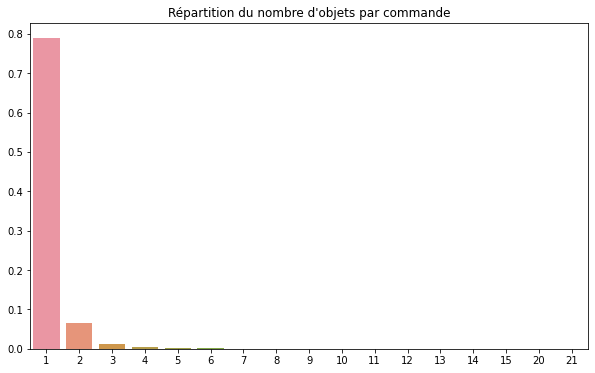

In [ ]:
plt.figure(figsize = (10,6))
plt.title("Répartition du nombre d'objets par commande")
sns.barplot(y =  items_clean.order_item_id.value_counts().values/len(items), x = items_clean.order_item_id.value_counts().index)
plt.show()

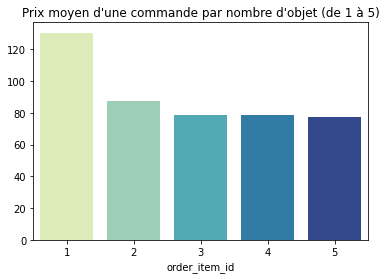

In [ ]:
plt.title("Prix moyen d'une commande par nombre d'objet (de 1 à 5)")
sns.barplot(x = items_clean.groupby('order_item_id').price.mean().head(5).index , y = items_clean.groupby('order_item_id').price.mean().head(5).values,palette='YlGnBu')
plt.show()

Désormais je vais répondre aux questions posées.

## Question 1 : Combien d'objets sont dans les commandes des clients? 

Si on veut voir le nombre d'objets total vendus, cela nous donne : 

In [ ]:
print('{} objets sont dans les commandes des clients au total.'.format(len(items)))

112650 objets sont dans les commandes des clients au total.


On peut aussi voir la répartition du nombre de commandes des clients au total, comme montrer dans l'analyse de la table items.

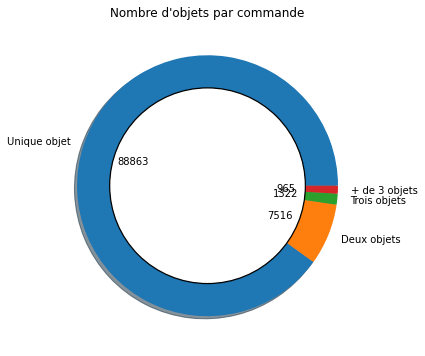

In [ ]:
plt.figure(figsize=(12,6))
values = [len(items_clean[items_clean.order_item_id == 1]),len(items_clean[items_clean.order_item_id == 2]),len(items_clean[items_clean.order_item_id == 3]),len(items_clean[items_clean.order_item_id >3])]
def make_autopct(values):
    def my_autopct(pct):
        total = sum(values)
        val = int(round(pct*total/100.0))
        return '{v:d}'.format(p=pct,v=val)
    return my_autopct
labels = ['Unique objet', 'Deux objets','Trois objets','+ de 3 objets']
plt.pie(values, explode=(0,0,0,0), labels=labels,
        autopct=make_autopct(values), shadow=True)
my_circle=plt.Circle((0,0),0.75,color='black', fc='white',linewidth=1.25)
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.title("Nombre d'objets par commande")
plt.show()

Passons maintenant à la question sur le panier moyen. 
Le panier moyen est le montant moyen dépensé par les acheteurs à chaque fois qu'il fréquente le point de vente. Ce sera donc pour ce cas, la somme des prix des commandes divisés par le nombre de commande.

In [ ]:
print('Le nombre total de commandes est de {}.'.format(len(orders)))

Le nombre total de commandes est de 99441.


In [ ]:
print('Le montant total des commandes est de {}€.'.format(items.price.sum()))

Le montant total des commandes est de 13591643.700000003€.


In [ ]:
print("Le panier moyen est donc de {avg:.2f}€ pour en moyenne {avg2:.2f} objets par commande.".format(avg=items.price.sum()/len(orders),avg2=items_clean.order_item_id.mean()))

Le panier moyen est donc de 136.68€ pour en moyenne 1.14 objets par commande.


## Question 2 : Quelles sont les catégories de produit les fréquentes?

Pour répondre à cette question, je dois joindre la table items avec la table products.

In [ ]:
q2 = pd.merge(items, products[['product_id','product_category_name']], how='left', on='product_id')

On remarque les catégories de produits les plus fréquentes sont ce qui concernent la salle à manger, chambre et salle de bain suivi des produits de beautés et des activités sportives.

In [ ]:
q2.product_category_name.value_counts().head(10)

bed_bath_table           11115
health_beauty             9670
sports_leisure            8641
furniture_decor           8334
computers_accessories     7827
housewares                6964
watches_gifts             5991
telephony                 4545
garden_tools              4347
auto                      4235
Name: product_category_name, dtype: int64

Une autre manière de le représenter est le graphique suivant : 


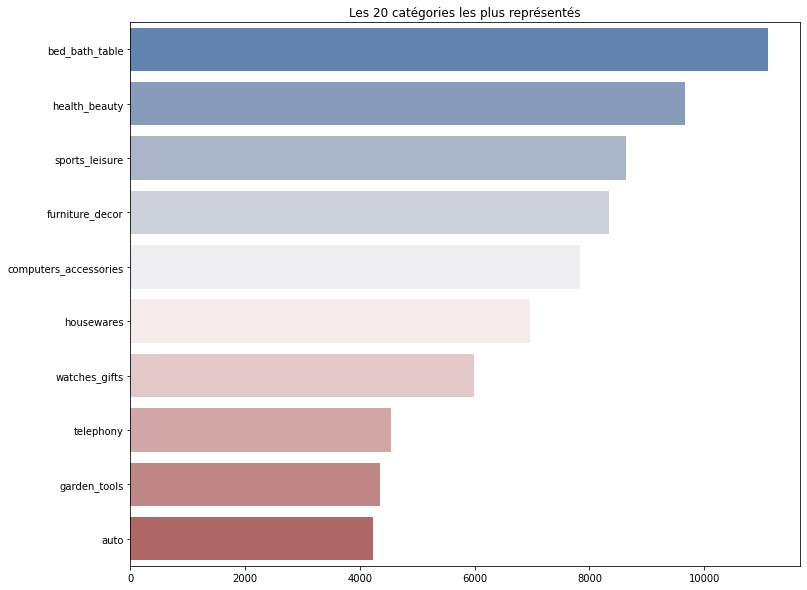

In [ ]:
plt.figure(figsize=(12,10))
plt.title('Les 20 catégories les plus représentés')
sns.barplot(x = q2.product_category_name.value_counts().head(10).values, y = q2.product_category_name.value_counts().head(10).index, palette="vlag")

## Question 3 : Comment évolue les ventes au cours du temps ?

En réalisant l'analyse descriptive de la table orders, nous avions un début de réponse si l'on considère uniquement les commandes et leur nombre au cours du temps. En réutilisant les deux graphiques ci dessous, il est notable de voir que : 

  - Le nombre de vente augmente tout au long de l'année 2017 pour exploser en Novembre 2017 et atteindre son maximum à cette même date.
  - En 2018, les ventes stagnent et reste quasi identique avec quelques régressions par rapport au mois précedent.

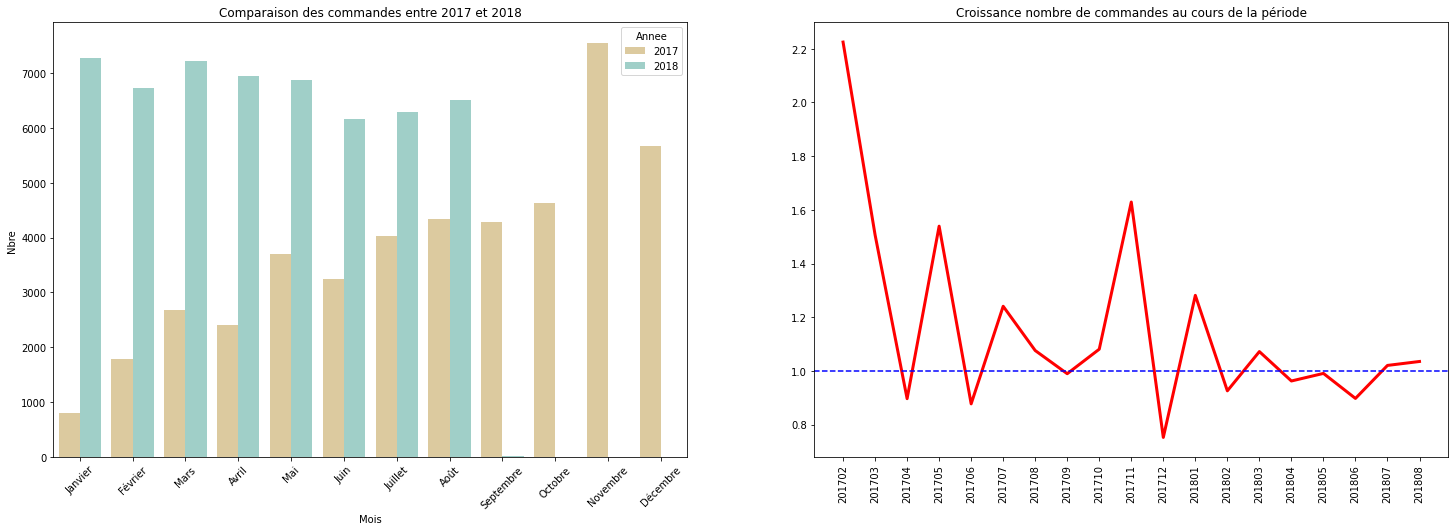

In [ ]:
plt.figure(figsize=(25,8))
plt.subplot(1,2,1)
plt.title('Comparaison des commandes entre 2017 et 2018')
sns.barplot(data = data, x = "Mois", y = "Nbre", hue ="Annee", palette='BrBG')
plt.xticks(rotation=45)
data2 =(pd.DataFrame(orders['Month_year'].value_counts().sort_index()) / pd.DataFrame(orders['Month_year'].value_counts().sort_index()).shift())[4:-2]
plt.subplot(1,2,2)
plt.title('Croissance nombre de commandes au cours de la période')
sns.lineplot(data=data2.Month_year, 
             color='red', linewidth=3)
plt.axhline(y=1, color='blue', linestyle='--')
plt.xticks(rotation=90)

plt.show()

Il est aussi important de voir l'évolution des ventes en termes d'argent engendré. 
Pour ce faire, je vais lier la table items avec la table orders en prenant soin de calculer le total par commande.


In [32]:
total_commande = pd.DataFrame(items.groupby('order_id').price.sum())
evol_sales = pd.merge(orders, total_commande, how='left', left_on="order_id", right_index=True)

In [ ]:
data3 = pd.DataFrame()
lst = []
dic = {1:"Janvier",2:"Février",3:"Mars",4:"Avril",5:"Mai",6:"Juin",7:"Juillet",8:"Août",9:"Septembre",10:"Octobre",
          11:"Novembre",12:"Décembre"}
for year in evol_sales.Year.unique():
    for mois in evol_sales.NumMonth.unique():
        nb = evol_sales[(evol_sales.NumMonth == mois) & (evol_sales.Year == year)].price.sum()
        lst += [(year, mois, nb, dic[mois])]
data3 = pd.DataFrame(lst, columns = ['Annee','NumMois','Prix',"Mois"])
data3 = data3[data3.Annee > 2016]
data3.sort_values(["Annee","NumMois"],inplace=True)
data3.Prix = data3.Prix / 1000

La même tendance est retrouvé cette fois ci en fonction de la somme des totaux des objets vendus.

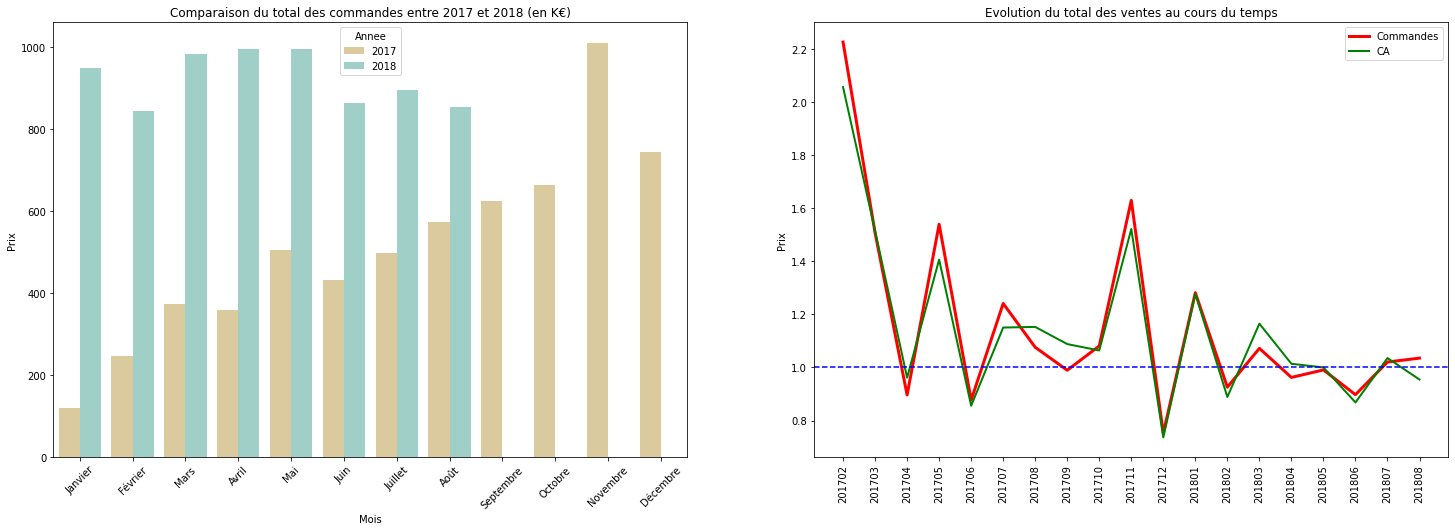

In [ ]:
plt.figure(figsize=(25,8))
plt.subplot(1,2,1)
plt.title('Comparaison du total des commandes entre 2017 et 2018 (en K€)')
sns.barplot(data = data3[:-4], x = "Mois", y = "Prix", hue ="Annee", palette='BrBG')
plt.xticks(rotation=45)
plt.subplot(1,2,2)
plt.title('Evolution du total des ventes au cours du temps')
data4 = pd.DataFrame(data3.Prix / data3.Prix.shift())[1:-4]
data4.index = data2.index
sns.lineplot(data=data2.Month_year, 
             color='red', linewidth=3)
sns.lineplot(x = data4.index, y=data4.Prix, 
             color='green', linewidth=2)
plt.axhline(y=1, color='blue', linestyle='--')
plt.xticks(rotation=90)
plt.legend(['Commandes',"CA"],loc='upper right')
plt.show()

## Question 4 : Quelles sont les best-sellers ? Comment se répartissent-ils dans les ventes ?


In [ ]:
best_sellers = pd.merge(items, products, how = 'left', on ='product_id')

Dans ce jeu de données, le nom de l'objet n'est pas disponible. Seul l'id du produit l'est. Ce que nous allons faire pour différencier les objets. 

In [ ]:
print('Il existe {} produits différents. En moyenne, un même produit se vend 3 fois.'.format(len(best_sellers.product_id.unique())))

Il existe 32951 produits différents. En moyenne, un même produit se vend 3 fois.


In [ ]:
best_sellers.product_id.value_counts().describe()

count    32951.000000
mean         3.418713
std         10.619709
min          1.000000
25%          1.000000
50%          1.000000
75%          3.000000
max        527.000000
Name: product_id, dtype: float64

Je décide de ne garder que les 10 objets les plus vendus en terme de fois. Voici donc la liste des 10 produits les plus vendus.

In [ ]:
best_sellers.product_id.value_counts().head(10)

aca2eb7d00ea1a7b8ebd4e68314663af    527
99a4788cb24856965c36a24e339b6058    488
422879e10f46682990de24d770e7f83d    484
389d119b48cf3043d311335e499d9c6b    392
368c6c730842d78016ad823897a372db    388
53759a2ecddad2bb87a079a1f1519f73    373
d1c427060a0f73f6b889a5c7c61f2ac4    343
53b36df67ebb7c41585e8d54d6772e08    323
154e7e31ebfa092203795c972e5804a6    281
3dd2a17168ec895c781a9191c1e95ad7    274
Name: product_id, dtype: int64

Concernant la répartition de ces meilleurs ventes dans le total du nombre d'objets vendus et dans le montant engendré, nous atteignons les montants respectifs de 3.9% et 2.2%.

In [ ]:
np.sum(best_sellers.product_id.value_counts().head(10) / len(orders))

0.038947717742178777

In [ ]:
best_sellers[best_sellers.product_id.isin(list(best_sellers.product_id.value_counts().head(10).index))].price.sum() / best_sellers.price.sum()

0.02224911104754754

In [ ]:
best_sellers[best_sellers.product_id.isin(list(best_sellers.product_id.value_counts().head(10).index))].groupby('product_id').price.sum()

product_id
154e7e31ebfa092203795c972e5804a6     6325.19
368c6c730842d78016ad823897a372db    21056.80
389d119b48cf3043d311335e499d9c6b    21440.59
3dd2a17168ec895c781a9191c1e95ad7    41082.60
422879e10f46682990de24d770e7f83d    26577.22
53759a2ecddad2bb87a079a1f1519f73    20387.20
53b36df67ebb7c41585e8d54d6772e08    37683.42
99a4788cb24856965c36a24e339b6058    43025.56
aca2eb7d00ea1a7b8ebd4e68314663af    37608.90
d1c427060a0f73f6b889a5c7c61f2ac4    47214.51
Name: price, dtype: float64

## Question 5 : Analyser les ventes au cours du temps (heures, jours etc) et essayer de prédire les futures ventes.

Comme vu lors de l'analyse de l'analayse de la table orders, il semblerait avoir quelques différences en fonction du temps.

Tout d'abord, regardons l'impact de l'heure sur la consommation en fonction du jour de la semaine.

In [ ]:
lst = []
for jour in orders.WeekDay.unique():
  for heure in orders.ExactHour.unique():
    nb = len(orders[(orders.WeekDay == jour) & (orders.ExactHour == heure)])
    lst += [(jour, heure, nb)]
hour_day = pd.DataFrame(lst, columns = ['Jour','Heure','nb'])

Deux effets du temps sont à remarquer sur le nombre de commandes : 



*   Le jour de la semaine semble jouer sur le nombre de vente car les deux jours où il y a en moyenne le moins de vente sont le Dimanche et le Samedi.
*   L'heure aussi a un impact significatif sur les ventes. En effet, comme le montre le premier graphique ci-dessous, la nuit/le matin jusqu'à 8 heures, les ventes sont beaucoup moins importantes qu'entre 10 et 20 heures. Par contre à partir de 21 heures, les ventes recommencent à diminuer pour atteindre 400 en moyenne. A noter qu'il n'y a presque aucun lien entre le jour et l'heure, car les ventes semblent identique.


Il est difficile par contre de voir s'il existe une tendance mensuelle et/ ou trimestrielle car le jeu de donnée s'arrête avant la fin d'année 2018.






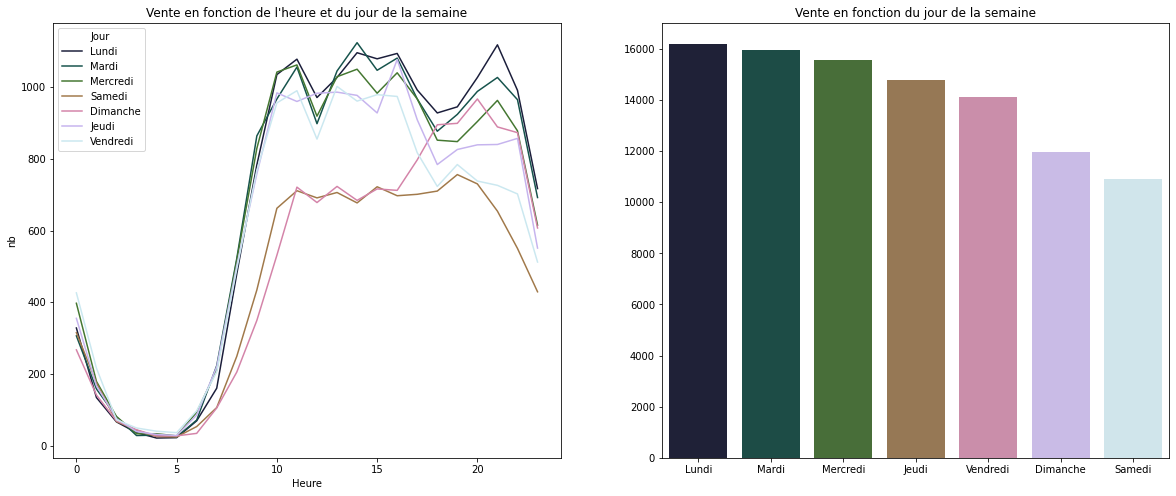

In [ ]:
plt.figure(figsize = (20,8))
plt.subplot(1,2,1)
plt.title("Vente en fonction de l'heure et du jour de la semaine")
sns.lineplot(data = hour_day, x = "Heure" ,y = "nb", hue="Jour", palette = "cubehelix")

plt.subplot(1,2,2)
plt.title("Vente en fonction du jour de la semaine")
sns.barplot(x = orders.WeekDay.value_counts().index , y = orders.WeekDay.value_counts().values, palette = "cubehelix")
plt.show()

Pour prédire les ventes, je penses qu'il faudrait prédire le nombre de commandes passés (il serait possible de vouloir prédire les montants gagnés aussi).

Je pourrais essayer de prédire les ventes futures mensuelles par exemple pour avoir les mois de fin d'année 2018. Au regard des données à ma disposition, je ne vois pas d'autres solutions que des séries temporelles (voir un LSTM) pour réaliser cela.

Cependant au vu du peu de données (19 mois d'historique) dont je dispose, il me semble compliquer d'obtenir un résultat correct.


In [ ]:
ventes = pd.DataFrame(orders.Month_year.value_counts().sort_index())[3:-2]

In [17]:
orders['Date'] = orders.order_purchase_timestamp.apply(datetime.date)

Création d'un dataframe des ventes journalières.

In [38]:
ventes = pd.DataFrame(orders.groupby('Date').Date.count().sort_index())
ventes = pd.merge(ventes, pd.DataFrame(evol_sales.groupby('Date').price.sum()),  left_index=True, right_index=True)
ventes.columns = ['Nb_Ventes','Montant_Ventes']

Dans un premier temps, on observe de nouveau le fait qu'il manque des données à gauche et à droite de notre historique. Je vais donc faire commencer la série au 01/01/2017 pour la finir au mois d'août 2018.
Ensite, il était possible de voir un pic en Novembre 2017 via les précédents graphiques mais en y regardant de plus prêt via les ventes journalières il est clair que cela correspond à un seul jour : le black friday.

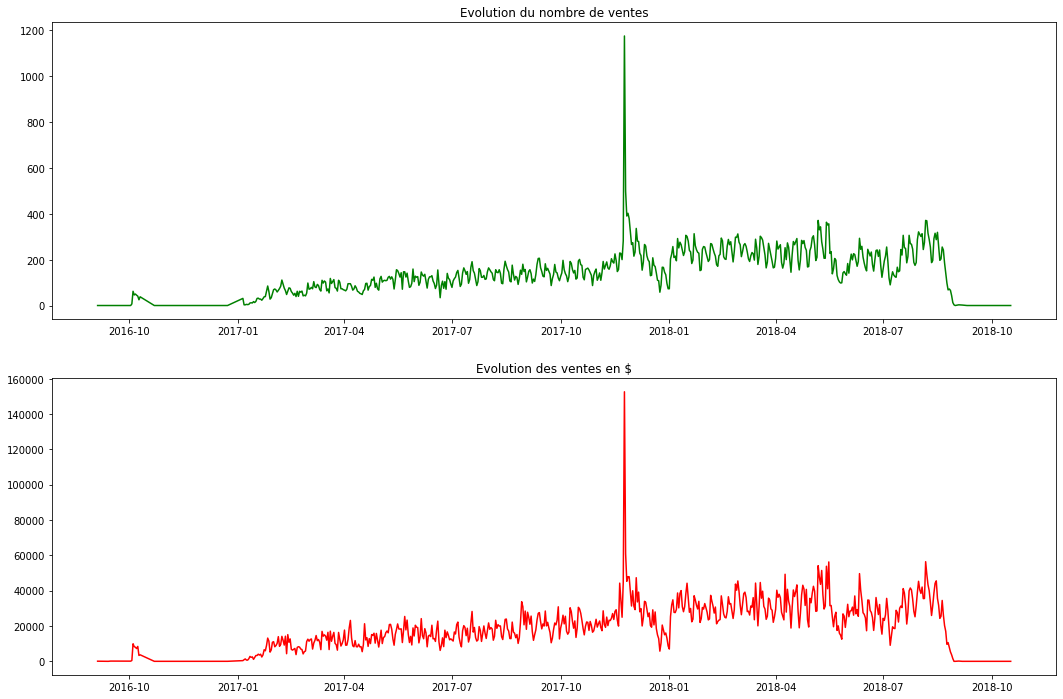

In [51]:
plt.figure(figsize=(18,12))
plt.subplot(2,1,1)
plt.title('Evolution du nombre de ventes')
sns.lineplot(data=ventes.Nb_Ventes, 
             color='green')
plt.subplot(2,1,2)
plt.title('Evolution des ventes en $')
sns.lineplot(data=ventes.Montant_Ventes, 
             color='red')
plt.show()

Le dataset est donc une série de 598 données où nous avons bien pour les 598 jours des valeurs.


In [209]:
ventes.index = pd.to_datetime(ventes.index)
ventes = ventes[(ventes.index >= datetime(2017,1,1)) & (ventes.index <= datetime(2018,8,25))]
len(ventes)

598

In [210]:
ventes.describe()

,Nb_Ventes,Montant_Ventes
count,598.000000,598.000000
mean,165.366221,22613.839816
std,90.013630,12355.502478
min,4.000000,396.900000
25%,105.000000,13712.960000
50%,153.000000,20954.520000
75%,219.000000,29665.432500
max,1176.000000,152653.740000


Je vais désormais utiliser les séries temporelles pour essayer de prédire les ventes journalières. On remarque qu'il y a clairement une saisonalité dans notre jeu de donnée, vraisemblablement avec les jours de la semaine.

Pour voir si la série est stationnaire, on va réaliser un 'Augmented Dick Fuller' test. Si la p-value est supérieur à 0.05, on aura alors une racine unitaire et la série sera non stationnaire.

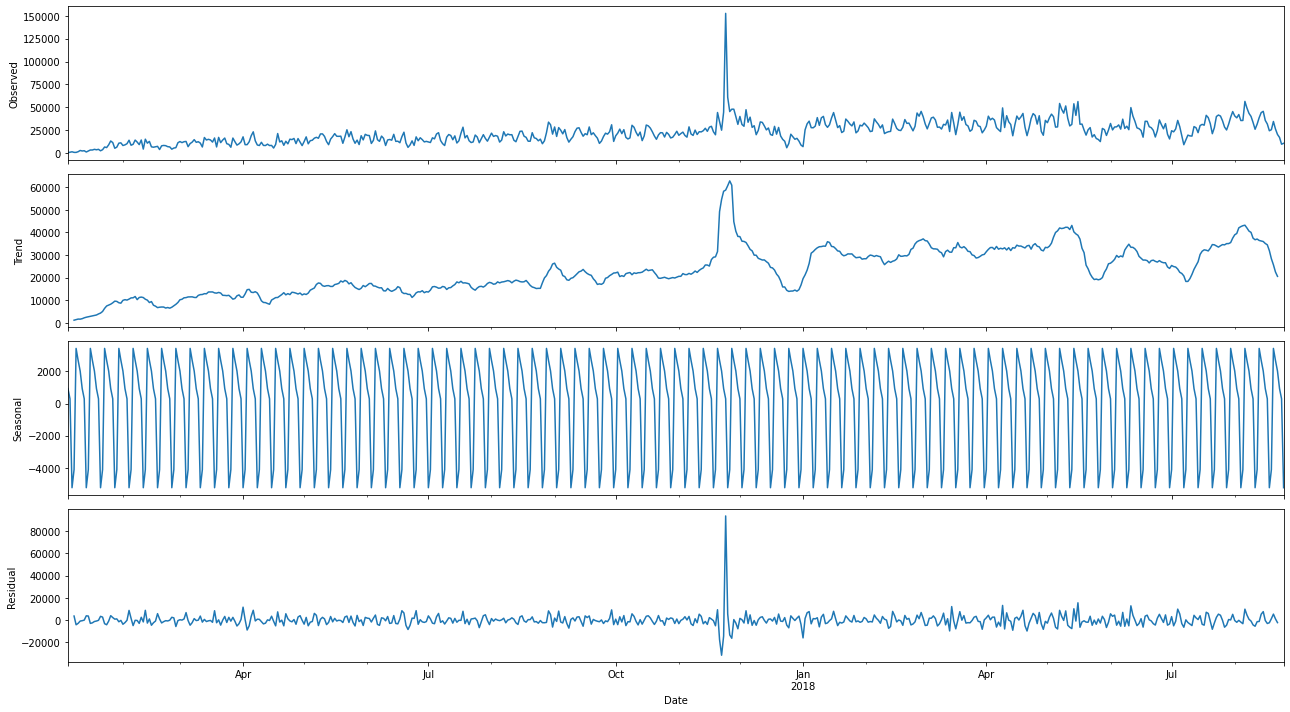

In [211]:
import statsmodels.api as sm
decomposition = sm.tsa.seasonal_decompose(ventes[['Montant_Ventes']], model='additive')
fig = decomposition.plot()
plt.show()

On rejette l'hypothèse nulle H0, notre série est stationnaire.

In [212]:
from statsmodels.tsa.stattools import adfuller
result = adfuller(ventes.Montant_Ventes.values, autolag='AIC')
print(f'ADF: {result[0]}')
print(f'p-value: {result[1]}')
for key, value in result[4].items():
    print('Valeurs critiques:')
    print(f'   {key}, {value}')

ADF: -3.2325979622329393
p-value: 0.01817363943325022
Valeurs critiques:
   1%, -3.441635870156286
Valeurs critiques:
   5%, -2.866518854162241
Valeurs critiques:
   10%, -2.569421591856497


En réalisant une différenciation d'ordre 1, on obtient un plot d'autocorrélation un peu meilleur qu'à l'ordre 0. 
Pour d = 1, on a q = 2.


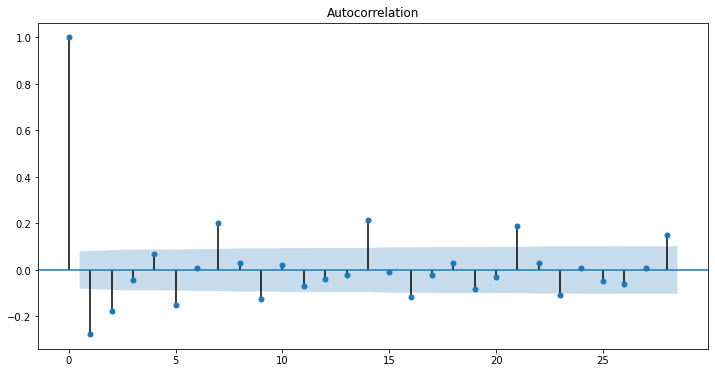

In [104]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
fig, ax = plt.subplots(figsize=(12, 6))
plot_acf(ventes.Montant_Ventes.diff().dropna(),ax=ax)
plt.show()

Pour d = 1, on peux fixer p = 3 vu que la 4ème colle la région de confiance, sinon on peut faire p = 6

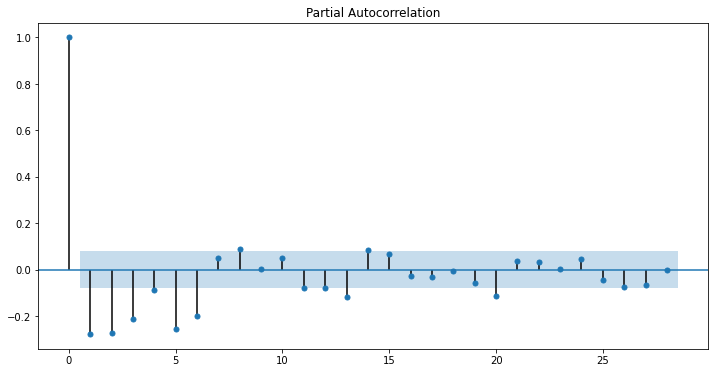

In [110]:
fig, ax = plt.subplots(figsize=(12, 6))
plot_pacf(ventes.Montant_Ventes.diff().dropna(),ax=ax)
plt.show()

In [213]:
from statsmodels.tsa.arima_model import ARIMA
model = ARIMA(ventes.Montant_Ventes, order=(2,1,2))
model_fit = model.fit(disp=0)
print(model_fit.summary())

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


                             ARIMA Model Results                              
Dep. Variable:       D.Montant_Ventes   No. Observations:                  597
Model:                 ARIMA(2, 1, 2)   Log Likelihood               -6192.382
Method:                       css-mle   S.D. of innovations           7730.857
Date:                Wed, 05 Aug 2020   AIC                          12396.764
Time:                        09:42:07   BIC                          12423.116
Sample:                    01-06-2017   HQIC                         12407.025
                         - 08-25-2018                                         
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                     28.1906     93.915      0.300      0.764    -155.880     212.261
ar.L1.D.Montant_Ventes     0.7807      0.213      3.660      0.000       0.363       1.199
ar.L

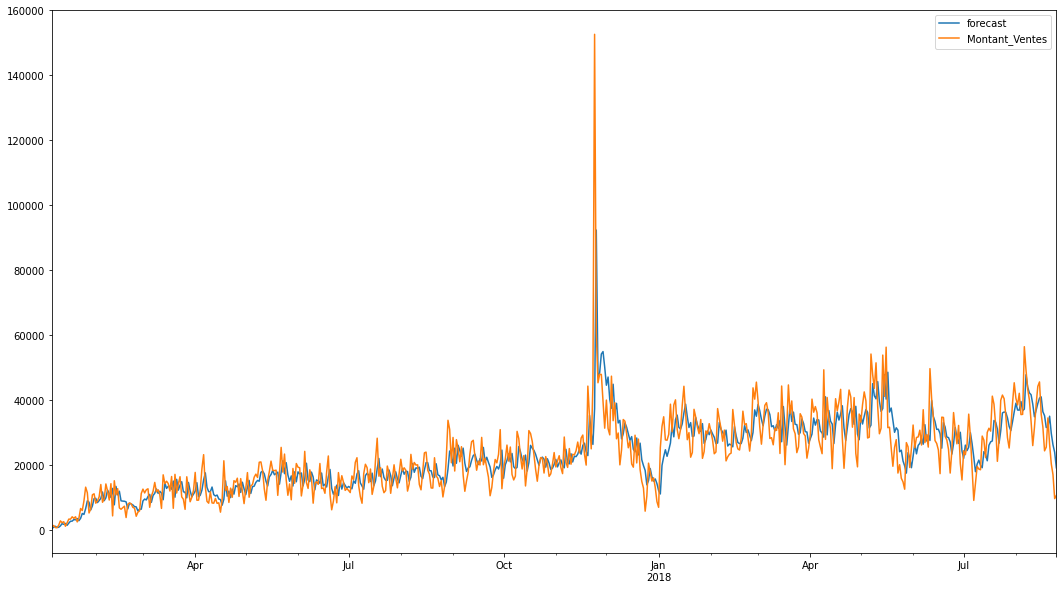

In [214]:
model_fit.plot_predict(dynamic=False)
plt.show()

In [216]:
train, test = ventes[(ventes.index <= datetime(2018,4,30))], ventes[(ventes.index > datetime(2018,4,30))]
len(train),len(test)

(481, 117)

In [222]:
model = ARIMA(train.Montant_Ventes, order=(2,1,2))
model_fit = model.fit(disp=0)
print(model_fit.summary())

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


                             ARIMA Model Results                              
Dep. Variable:       D.Montant_Ventes   No. Observations:                  480
Model:                 ARIMA(2, 1, 2)   Log Likelihood               -4976.953
Method:                       css-mle   S.D. of innovations           7698.568
Date:                Wed, 05 Aug 2020   AIC                           9965.907
Time:                        09:44:18   BIC                           9990.949
Sample:                    01-06-2017   HQIC                          9975.750
                         - 04-30-2018                                         
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                     65.0302     73.437      0.886      0.376     -78.903     208.964
ar.L1.D.Montant_Ventes     0.2323      0.368      0.631      0.528      -0.489       0.954
ar.L

In [223]:
fc, se, conf = model_fit.forecast(len(test), alpha=0.05)  # 95% conf
fc_series = pd.Series(fc, index=test.index)
lower_series = pd.Series(conf[:, 0], index=test.index)
upper_series = pd.Series(conf[:, 1], index=test.index)

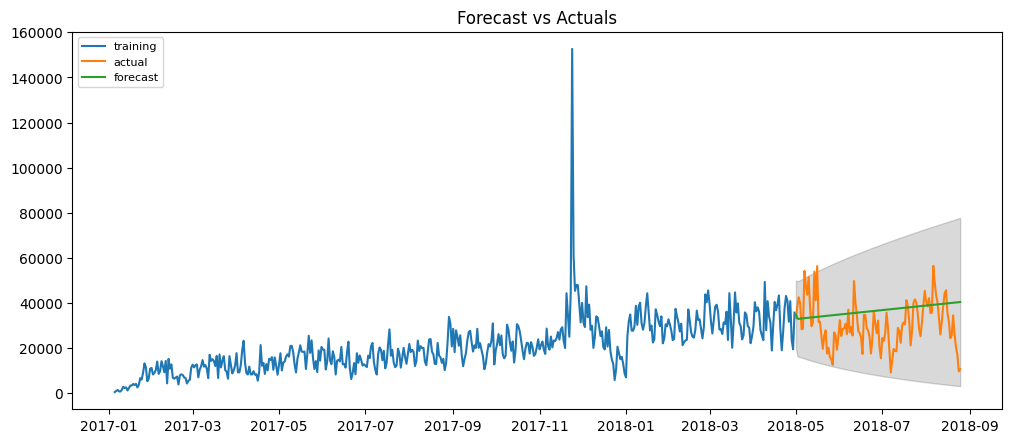

RMSE : 11963.380111700082


In [224]:
plt.figure(figsize=(12,5), dpi=100)
plt.plot(train.Montant_Ventes, label='training')
plt.plot(test.Montant_Ventes, label='actual')
plt.plot(fc_series, label='forecast')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.15)
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()
print('RMSE :',np.mean((fc - test.Montant_Ventes)**2)**.5)


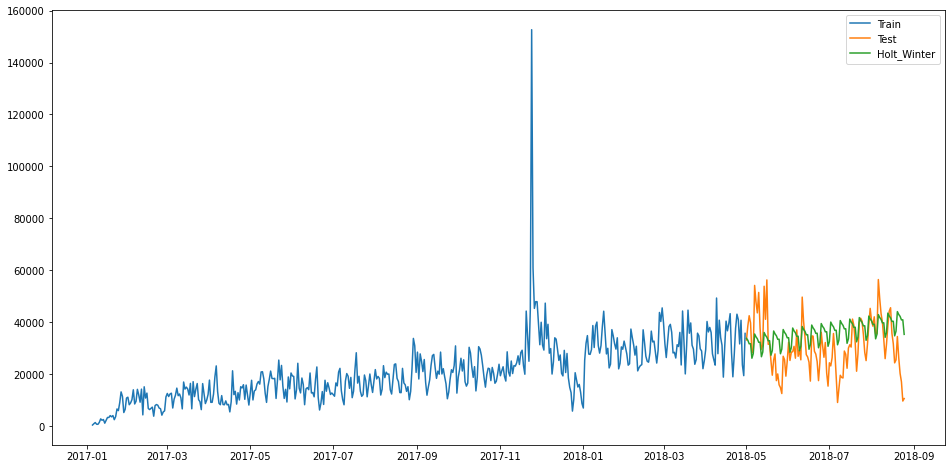

RMSE : 10898.227558244378


In [217]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing
HoltWinter = ExponentialSmoothing(np.asarray(train.Montant_Ventes) ,seasonal_periods=7 ,trend='add', seasonal='add',).fit()
y_hat = HoltWinter.forecast(len(test))
y_hat = pd.Series(y_hat, index=test.index)
plt.figure(figsize=(16,8))
plt.plot( train['Montant_Ventes'], label='Train')
plt.plot(test['Montant_Ventes'], label='Test')
plt.plot(y_hat, label='Holt_Winter')
plt.legend(loc='best')
plt.show()
print('RMSE :',np.mean((y_hat - test.Montant_Ventes)**2)**.5)

In [249]:
def best_predict(p,d,q):
  fit = sm.tsa.statespace.SARIMAX(train.Montant_Ventes, order=(2, 1, 2),seasonal_order=(p,d,q,7)).fit()
  y_hat_sarima = fit.predict(start="2018-5-1", end="2018-8-25", dynamic=True)
  y_hat_sarima = pd.Series(y_hat_sarima, index=test.index)
  aic = fit.aic
  RMSE = np.mean((y_hat_sarima - test.Montant_Ventes)**2)**.5
  return (p,d,q), aic, RMSE

In [256]:
data = []
for i in range(0,5):
  for j in range(0,5):
    for k in range(0,5):
      try:
        data += [(best_predict(i,j,k))]
      except:
        print('erreur pour le triplet ', (i,j,k))

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.6/dist-packa

erreur pour le triplet  (0, 3, 1)


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No 

erreur pour le triplet  (0, 4, 1)


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.6/dist-packa

erreur pour le triplet  (2, 3, 3)


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


erreur pour le triplet  (2, 4, 1)


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maxim

In [257]:
results = pd.DataFrame(data, columns = ['Triplet','Aic','RMSE'])
results

,Triplet,Aic,RMSE
0,"(0, 0, 0)",9964.583263,1.022203e+04
1,"(0, 0, 1)",9951.823279,1.024880e+04
2,"(0, 0, 2)",9948.962062,1.020065e+04
3,"(0, 0, 3)",9945.975909,1.010847e+04
4,"(0, 0, 4)",9947.956173,1.010354e+04
...,...,...,...
116,"(4, 4, 0)",11711.009935,6.809919e+06
117,"(4, 4, 1)",11720.527788,1.363680e+07
118,"(4, 4, 2)",11716.185605,4.350818e+06
119,"(4, 4, 3)",11716.238260,5.386787e+06


In [258]:
results[results.Aic == results.Aic.min()]


,Triplet,Aic,RMSE
29,"(1, 1, 1)",9789.023835,9723.271971


In [259]:
results[results.RMSE == results.RMSE.min()]

,Triplet,Aic,RMSE
12,"(0, 2, 2)",9880.595122,9104.454753


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


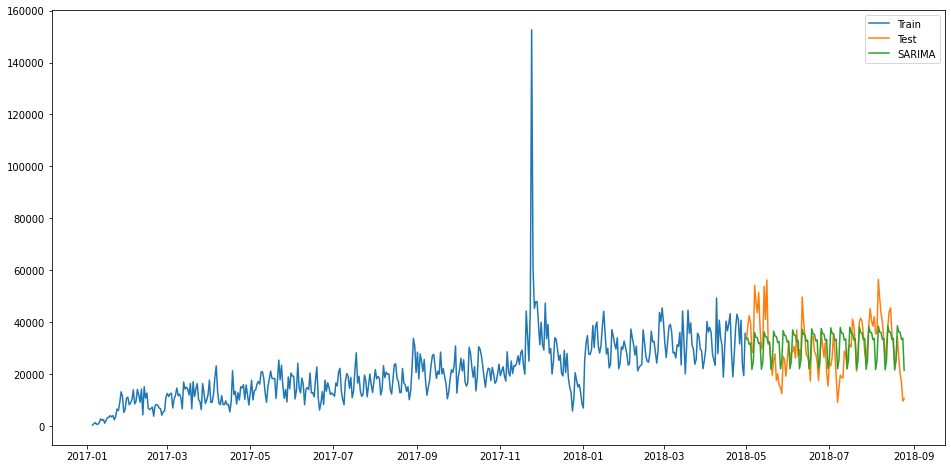

RMSE : 9104.454752867214


In [260]:
fit1 = sm.tsa.statespace.SARIMAX(train.Montant_Ventes, order=(2, 1, 2),seasonal_order=(0,2,2,7)).fit()
y_hat_sarima = fit1.predict(start="2018-5-1", end="2018-8-25", dynamic=True)
y_hat_sarima = pd.Series(y_hat_sarima, index=test.index)
plt.figure(figsize=(16,8))
plt.plot( train['Montant_Ventes'], label='Train')
plt.plot(test['Montant_Ventes'], label='Test')
plt.plot(y_hat_sarima, label='SARIMA')
plt.legend(loc='best')
plt.show()
print('RMSE :',np.mean((y_hat_sarima - test.Montant_Ventes)**2)**.5)

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  


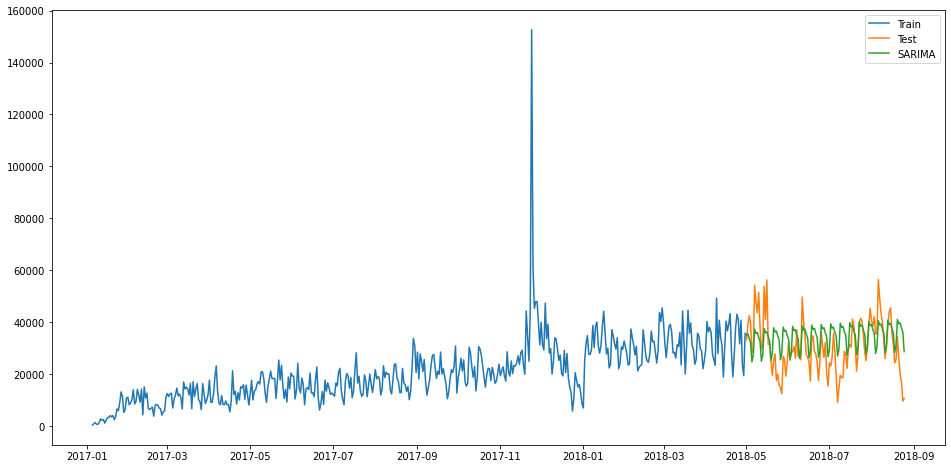

RMSE : 9723.27197129593


In [255]:
fit1 = sm.tsa.statespace.SARIMAX(train.Montant_Ventes, order=(2, 1, 2),seasonal_order=(1,1,1,7)).fit()
y_hat_sarima = fit1.predict(start="2018-5-1", end="2018-8-25", dynamic=True)
y_hat_sarima = pd.Series(y_hat_sarima, index=test.index)
plt.figure(figsize=(16,8))
plt.plot( train['Montant_Ventes'], label='Train')
plt.plot(test['Montant_Ventes'], label='Test')
plt.plot(y_hat_sarima, label='SARIMA')
plt.legend(loc='best')
plt.show()
print('RMSE :',np.mean((y_hat_sarima - test.Montant_Ventes)**2)**.5)

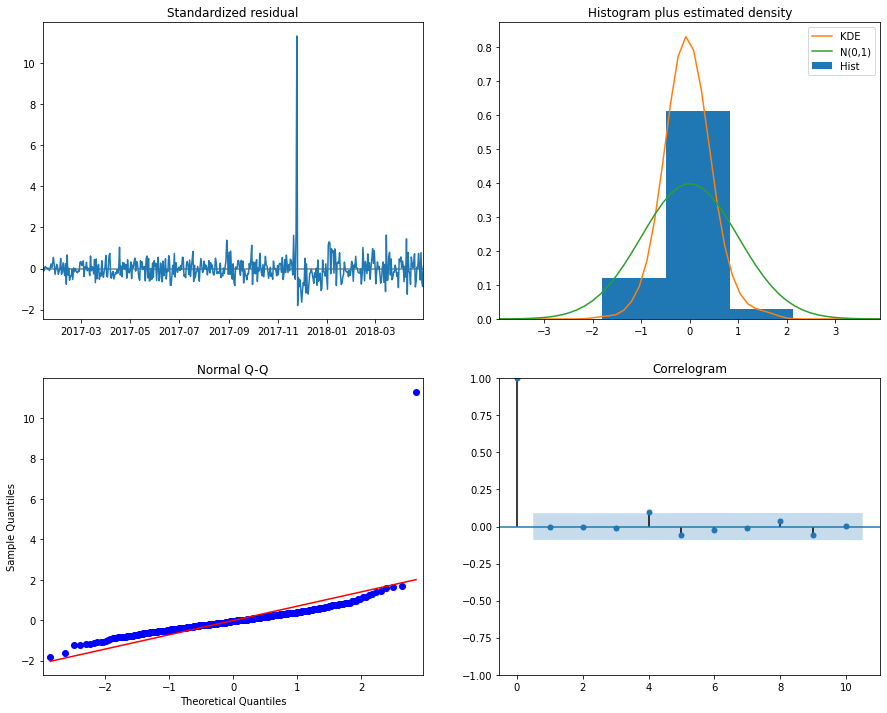

In [237]:
fit1.plot_diagnostics(figsize=(15,12));